In [3]:
## Milan

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, LSTM, BatchNormalization,Embedding,TimeDistributed ,Input ,Flatten,SimpleRNN
from tensorflow.keras.callbacks import CSVLogger , EarlyStopping , ModelCheckpoint
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix,ConfusionMatrixDisplay
from collections import deque
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

In [4]:
# #-----sistem
# path_to_file = "data_onehot.csv"

#Google
from google.colab import drive
drive.mount('/content/drive')
path_to_file = "./drive/MyDrive/deep/Milan/data_onehot.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data= pd.read_csv(path_to_file ,header='infer',sep=',') #,names=['Data','time','senssor','value_senssor','activety','value_activety'])

# lable= data.activety
# #----------------- set and len
# # label
# vocab_lable = sorted(set(lable))                # sort unique data
# n_activety=len(vocab_lable)
# print ('{} unique characters'.format(n_activety))



In [6]:
df=data
sequential_data = [] 

# #------RNN
# SEQ_LEN=5
# prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in
# for i in df.values:  # iterate over the values
#     prev_days.append([n for n in i[:-1]])  # store all but the target
#     if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
#         sequential_data.append([np.array(prev_days), i[-1]])  # append those bad boys!

#------MLP
for i in df.values:  # iterate over the values
    sequential_data.append([np.array([n for n in i[:-1]]), i[-1]])  # append those bad boys!

random.shuffle(sequential_data)  # shuffle for good measure.


In [7]:

t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[]

for seq, target in sequential_data: 
    if target == 0:  
        t0.append([seq, target])  
    elif target == 1: 
        t1.append([seq, target])  
    elif target == 2: 
        t2.append([seq, target])   
    elif target == 3: 
        t3.append([seq, target])   
    elif target == 4: 
        t4.append([seq, target])   
    elif target == 5: 
        t5.append([seq, target])   
    elif target == 6: 
        t6.append([seq, target])   
    elif target == 7: 
        t7.append([seq, target])   
    elif target == 8: 
        t8.append([seq, target])   
    elif target == 9: 
        t9.append([seq, target])   
    elif target == 10: 
        t10.append([seq, target])   
    elif target == 11: 
        t11.append([seq, target])   
    elif target == 12: 
        t12.append([seq, target])   
    elif target == 13: 
        t13.append([seq, target])   
    elif target == 14: 
        t14.append([seq, target]) 

random.shuffle(t0),random.shuffle(t1),random.shuffle(t2),random.shuffle(t3),random.shuffle(t4),random.shuffle(t5),random.shuffle(t6),random.shuffle(t7),random.shuffle(t8),random.shuffle(t9),random.shuffle(t10),random.shuffle(t11),random.shuffle(t12),random.shuffle(t13),random.shuffle(t14)
print(' ')

In [8]:
t0_l,t1_l,t2_l,t3_l,t4_l,t5_l,t6_l,t7_l,t8_l,t9_l,t10_l,t11_l,t12_l,t13_l,t14_l = len(t0),len(t1),len(t2),len(t3),len(t4),len(t5),len(t6),len(t7),len(t8),len(t9),len(t10),len(t11),len(t12),len(t13),len(t14)

train_size= 0.7
test_size= 0.25

t0_l_train , t0_l_test = int(t0_l*train_size) ,int(t0_l*test_size)  
t1_l_train , t1_l_test = int(t1_l*train_size) ,int(t1_l*test_size) 
t2_l_train , t2_l_test = int(t2_l*train_size) ,int(t2_l*test_size) 
t3_l_train , t3_l_test = int(t3_l*train_size) ,int(t3_l*test_size) 
t4_l_train , t4_l_test = int(t4_l*train_size) ,int(t4_l*test_size) 
t5_l_train , t5_l_test = int(t5_l*train_size) ,int(t5_l*test_size) 
t6_l_train , t6_l_test = int(t6_l*train_size) ,int(t6_l*test_size) 
t7_l_train , t7_l_test = int(t7_l*train_size) ,int(t7_l*test_size) 
t8_l_train , t8_l_test = int(t8_l*train_size) ,int(t8_l*test_size) 
t9_l_train , t9_l_test = int(t9_l*train_size) ,int(t9_l*test_size) 
t10_l_train , t10_l_test = int(t10_l*train_size) ,int(t10_l*test_size) 
t11_l_train , t11_l_test = int(t11_l*train_size) ,int(t11_l*test_size) 
t12_l_train , t12_l_test = int(t12_l*train_size) ,int(t12_l*test_size) 
t13_l_train , t13_l_test = int(t13_l*train_size) ,int(t13_l*test_size) 
t14_l_train , t14_l_test = int(t14_l*train_size) ,int(t14_l*test_size) 

train_t0,train_t1,train_t2,train_t3,train_t4,train_t5,train_t6,train_t7,train_t8,train_t9,train_t10 = t0[:t0_l_train],t1[:t1_l_train],t2[:t2_l_train],t3[:t3_l_train],t4[:t4_l_train],t5[:t5_l_train],t6[:t6_l_train],t7[:t7_l_train],t8[:t8_l_train],t9[:t9_l_train],t10[:t10_l_train]
test_t0,test_t1,test_t2,test_t3,test_t4,test_t5,test_t6,test_t7,test_t8,test_t9,test_t10 = t0[t0_l_train:t0_l_train+t0_l_test] ,t1[t1_l_train:t1_l_train+t1_l_test],t2[t2_l_train:t2_l_train+t2_l_test],t3[t3_l_train:t3_l_train+t3_l_test],t4[t4_l_train:t4_l_train+t4_l_test],t5[t5_l_train:t5_l_train+t5_l_test],t6[t6_l_train:t6_l_train+t6_l_test],t7[t7_l_train:t7_l_train+t7_l_test],t8[t8_l_train:t8_l_train+t8_l_test],t9[t9_l_train:t9_l_train+t9_l_test],t10[t10_l_train:t10_l_train+t10_l_test]
val_t0,val_t1,val_t2,val_t3,val_t4,val_t5,val_t6,val_t7,val_t8,val_t9,val_t10 = t0[t0_l_train+t0_l_test:] ,t1[t1_l_train+t1_l_test:],t2[t2_l_train+t2_l_test:],t3[t3_l_train+t3_l_test:],t4[t4_l_train+t4_l_test:],t5[t5_l_train+t5_l_test:],t6[t6_l_train+t6_l_test:],t7[t7_l_train+t7_l_test:],t8[t8_l_train+t8_l_test:],t9[t9_l_train+t9_l_test:],t10[t10_l_train+t10_l_test:]

train_t11, train_t12, train_t13, train_t14 = t11[:t11_l_train] , t12[:t12_l_train] , t13[:t13_l_train] , t14[:t14_l_train]
test_t11, test_t12, test_t13, test_t14 = t11[t11_l_train:t11_l_train+t11_l_test] , t12[t12_l_train:t12_l_train+t12_l_test] , t13[t13_l_train:t13_l_train+t13_l_test] , t14[t14_l_train:t14_l_train+t14_l_test]
val_t11, val_t12, val_t13, val_t14 = t11[t11_l_train+t11_l_test:] , t12[t12_l_train+t12_l_test:] , t13[t13_l_train+t13_l_test:] , t14[t14_l_train+t14_l_test:] 

sequential_train = train_t0 + train_t1 + train_t2 + train_t3 +train_t4 + train_t5 + train_t6 + train_t7 + train_t8 + train_t9 + train_t10 + train_t11 + train_t12 + train_t13 + train_t14
sequential_test = test_t0+ test_t1+ test_t2+ test_t3+ test_t4+ test_t5+ test_t6+ test_t7+ test_t8+ test_t9+ test_t10+ test_t11+ test_t12+ test_t13+ test_t14
sequential_val = val_t0+ val_t1+ val_t2+ val_t3+ val_t4+ val_t5+ val_t6+ val_t7+ val_t8+ val_t9+ val_t10+ val_t11+ val_t12+ val_t13+ val_t14


In [9]:
x_train , y_train , x_test , y_test , x_val , y_val = [] ,[] ,[] ,[] ,[] ,[] 

for seq, target in sequential_train:  
        x_train.append(seq)  
        y_train.append(target)  
x_train=np.array(x_train)
y_train=np.array(y_train)

for seq, target in sequential_test:  
        x_test.append(seq)  
        y_test.append(target)  
x_test=np.array(x_test)
y_test=np.array(y_test)

for seq, target in sequential_val:  
        x_val.append(seq)  
        y_val.append(target)  
x_val=np.array(x_val)
y_val=np.array(y_val)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(164627, 37)
(164627,)
(58795, 37)
(58795,)
(11770, 37)
(11770,)


In [96]:
model = Sequential()

model.add(keras.Input(shape=(x_train.shape[1:]),name="Input_layer"))
model.add(BatchNormalization(name="BatchNormalization_layer_1"))

# model.add(LSTM(128,return_sequences=True,name="LSTM_layer_1"))
# model.add(Dropout(0.2,name="Dropout_layer_1"))
# model.add(BatchNormalization(name="BatchNormalization_layer_2"))

# model.add(LSTM(128,name="LSTM_layer_2"))
# model.add(Dropout(0.2,name="Dropout_layer_2"))
# model.add(BatchNormalization(name="BatchNormalization_layer_3"))

model.add(Dense(64, activation='relu',name="Dense_layer_1"))
model.add(Dropout(0.2,name="Dropout_layer_3"))

model.add(Dense(64, activation='relu',name="Dense_layer_2"))
model.add(Dropout(0.2,name="Dropout_layer_4"))

model.add(Dense(15, activation='softmax',name="Output_layer"))

In [97]:
keras.utils.plot_model(model, "Structure.jpg", show_shapes=True)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 BatchNormalization_layer_1   (None, 37)               148       
 (BatchNormalization)                                            
                                                                 
 Dense_layer_1 (Dense)       (None, 64)                2432      
                                                                 
 Dropout_layer_3 (Dropout)   (None, 64)                0         
                                                                 
 Dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 Dropout_layer_4 (Dropout)   (None, 64)                0         
                                                                 
 Output_layer (Dense)        (None, 15)                975       
                                                      

In [98]:
csv_logger = CSVLogger('training.log')
early_stopping = EarlyStopping(patience=20, monitor='val_accuracy')

checkpoint_path ='best_model.h5'
ckpt_callback = ModelCheckpoint(filepath= checkpoint_path,
                                monitor='val_accuracy',
                                save_best_only=True,
                                save_weights_only=False)

In [99]:
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

loss_fn = keras.losses.SparseCategoricalCrossentropy()#from_logits=True) #Sparse one hot kardan automatic target #from_logits emal tafe softmax vaghti linier gozashtim khorogy ro
model.compile(
    loss=loss_fn,
    optimizer=opt,
    metrics=['accuracy']
)


In [100]:
# Train model
initial_epoch=0
batch_size_=16*16*16*2
history = model.fit(x_train, y_train,
                    validation_data =(x_val,y_val),
                    batch_size=batch_size_,
                    epochs=1000,
                    initial_epoch=initial_epoch,
                    callbacks=[csv_logger,early_stopping,ckpt_callback])

Epoch 1/1000
21/21 [==============================] - 2s 45ms/step - loss: 2.3604 - accuracy: 0.3070 - val_loss: 1.9970 - val_accuracy: 0.4071
Epoch 2/1000
21/21 [==============================] - 1s 37ms/step - loss: 1.6766 - accuracy: 0.5548 - val_loss: 1.8174 - val_accuracy: 0.4992
Epoch 3/1000
21/21 [==============================] - 1s 64ms/step - loss: 1.3020 - accuracy: 0.6410 - val_loss: 1.6258 - val_accuracy: 0.5489
Epoch 4/1000
21/21 [==============================] - 2s 73ms/step - loss: 1.1575 - accuracy: 0.6744 - val_loss: 1.5187 - val_accuracy: 0.5832
Epoch 5/1000
21/21 [==============================] - 1s 62ms/step - loss: 1.0940 - accuracy: 0.6888 - val_loss: 1.4259 - val_accuracy: 0.6116
Epoch 6/1000
21/21 [==============================] - 1s 36ms/step - loss: 1.0626 - accuracy: 0.6949 - val_loss: 1.3454 - val_accuracy: 0.6387
Epoch 7/1000
21/21 [==============================] - 1s 36ms/step - loss: 1.0379 - accuracy: 0.7003 - val_loss: 1.2702 - val_accuracy: 0.6534

In [101]:
#Load Model
model = keras.models.load_model('best_model.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 BatchNormalization_layer_1   (None, 37)               148       
 (BatchNormalization)                                            
                                                                 
 Dense_layer_1 (Dense)       (None, 64)                2432      
                                                                 
 Dropout_layer_3 (Dropout)   (None, 64)                0         
                                                                 
 Dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 Dropout_layer_4 (Dropout)   (None, 64)                0         
                                                                 
 Output_layer (Dense)        (None, 15)                975       
                                                      

In [102]:
acc_per = model.evaluate(x_test,y_test)

1838/1838 [==============================] - 3s 1ms/step - loss: 0.6421 - accuracy: 0.7950


In [103]:
y_per_ = model.predict(x_test)

y_per=[]

for i in range(y_per_.shape[0]):
    y_per.append(np.argmax(y_per_[i]))
    
y_per=np.array(y_per)

In [104]:
acc_test = accuracy_score(y_test, y_per)
acc_test

0.7950335912917765

In [105]:
df_test_split = [test_t0,test_t1,test_t2,test_t3,test_t4,test_t5,test_t6,test_t7,test_t8,test_t9,test_t10,test_t11,test_t12,test_t13,test_t14]

acc_calss = []
for i in df_test_split:
    x_,y_=[],[]
    for seq, target in i:
        x_.append(seq)  
        y_.append(target) 
    x_=np.array(x_)
    y_=np.array(y_)
    acc_calss.append(model.evaluate(x_,y_))

151/151 [==============================] - 0s 1ms/step - loss: 0.8816 - accuracy: 0.7043


In [106]:
text_file = open("acc_report.txt", "w")
text_file.write('\nacc_test:\n')
text_file.write(str(acc_test))
text_file.write('\nacc_calss:\n')
text_file.write(str(acc_calss))
text_file.close()

In [107]:
lower_con=min(t0_l_test,t1_l_test,t2_l_test,t3_l_test,t4_l_test,t5_l_test,t6_l_test,t7_l_test,t8_l_test,t9_l_test,t10_l_test,t11_l_test,t12_l_test,t13_l_test,t14_l_test)
lower_con

7

In [108]:
lower_con=min(t0_l_test,t1_l_test,t2_l_test,t3_l_test,t4_l_test,t5_l_test,t6_l_test,t7_l_test,t8_l_test,t9_l_test,t10_l_test,t11_l_test,t12_l_test,t13_l_test,t14_l_test)



sequential_test_con = test_t0[:lower_con]+ test_t1[:lower_con]+ test_t2[:lower_con]+ test_t3[:lower_con]+ test_t4[:lower_con]+ test_t5[:lower_con]+ test_t6[:lower_con]+ test_t7[:lower_con]+ test_t8[:lower_con]+ test_t9[:lower_con]+ test_t10[:lower_con]+test_t11[:lower_con]+ test_t12[:lower_con]+ test_t13[:lower_con]+ test_t14[:lower_con]

x_test_con , y_test_con=[],[]

for seq, target in sequential_test_con:  
        x_test_con.append(seq)  
        y_test_con.append(target)  
x_test_con=np.array(x_test_con)
y_test_con=np.array(y_test_con)
                    
print(x_test_con.shape)
print(y_test_con.shape)

y_per_con_ = model.predict(x_test_con)

y_per_con=[]

for i in range(y_per_con_.shape[0]):
    y_per_con.append(np.argmax(y_per_con_[i]))
    
y_per_con=np.array(y_per_con)

acc_per = model.evaluate(x_test_con,y_test_con)
lower_con*15

(105, 37)
(105,)
4/4 [==============================] - 0s 3ms/step - loss: 1.5859 - accuracy: 0.5429


105

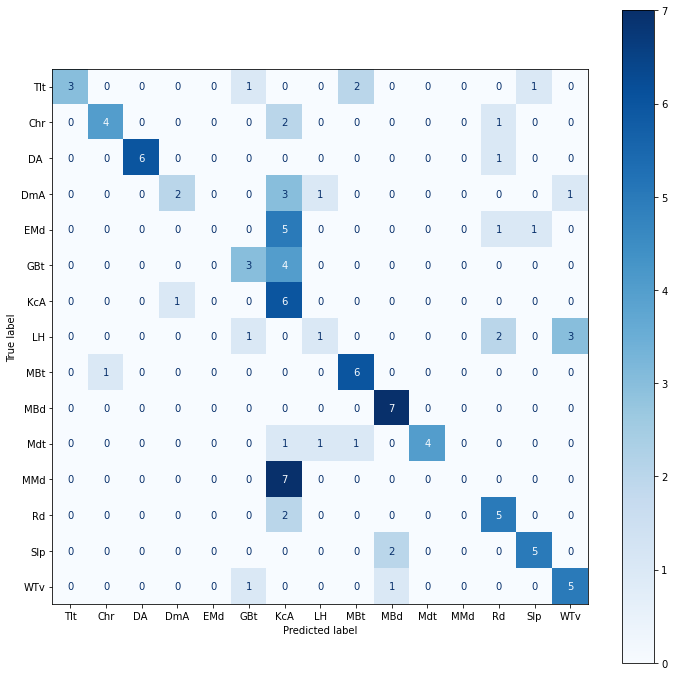

In [109]:
# labels = ['Bed_to_Toilet','Chores','Desk_Activity','Dining_Rm_Activity', 'Eve_Meds','Guest_Bathroom','Kitchen_Activity','Leave_Home','Master_Bathroom','Master_Bedroom_Activity','Meditate','Morning_Meds','Read','Sleep','Watch_TV']

labels = ['Tlt','Chr','DA ','DmA','EMd','GBt','KcA','LH','MBt','MBd','Mdt','MMd','Rd','Slp','WTv']


cm = confusion_matrix(y_test_con, y_per_con)

text_file = open("confusion_matrix_balance.txt", "w")
text_file.write(str(cm))
text_file.close()

cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(25))



disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(12,12))


disp.plot(ax=ax,cmap=plt.cm.Blues)

plt.savefig('ConfusionMatrixDisplay_balance.jpg')
plt.show()


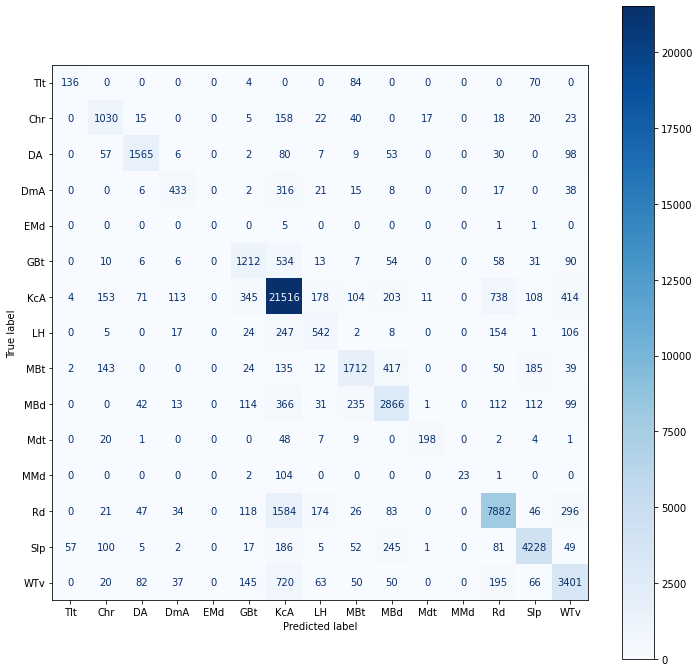

In [110]:
# labels = ['Bed_to_Toilet','Chores','Desk_Activity','Dining_Rm_Activity', 'Eve_Meds','Guest_Bathroom','Kitchen_Activity','Leave_Home','Master_Bathroom','Master_Bedroom_Activity','Meditate','Morning_Meds','Read','Sleep','Watch_TV']

labels = ['Tlt','Chr','DA ','DmA','EMd','GBt','KcA','LH','MBt','MBd','Mdt','MMd','Rd','Slp','WTv']


cm = confusion_matrix(y_test, y_per)

text_file = open("confusion_matrix.txt", "w")
text_file.write(str(cm))
text_file.close()

cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(25))



disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(12,12))


disp.plot(ax=ax,cmap=plt.cm.Blues)

plt.savefig('ConfusionMatrixDisplay.jpg')
plt.show()


In [111]:
classification_report_ = classification_report(y_test, y_per, target_names=labels)
print(classification_report_)


text_file = open("classification_report.txt", "w")
text_file.write(classification_report_)
text_file.close()

              precision    recall  f1-score   support

         Tlt       0.68      0.46      0.55       294
         Chr       0.66      0.76      0.71      1348
         DA        0.85      0.82      0.84      1907
         DmA       0.66      0.51      0.57       856
         EMd       0.00      0.00      0.00         7
         GBt       0.60      0.60      0.60      2021
         KcA       0.83      0.90      0.86     23958
          LH       0.50      0.49      0.50      1106
         MBt       0.73      0.63      0.68      2719
         MBd       0.72      0.72      0.72      3991
         Mdt       0.87      0.68      0.76       290
         MMd       1.00      0.18      0.30       130
          Rd       0.84      0.76      0.80     10311
         Slp       0.87      0.84      0.85      5028
         WTv       0.73      0.70      0.72      4829

    accuracy                           0.80     58795
   macro avg       0.70      0.60      0.63     58795
weighted avg       0.79   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


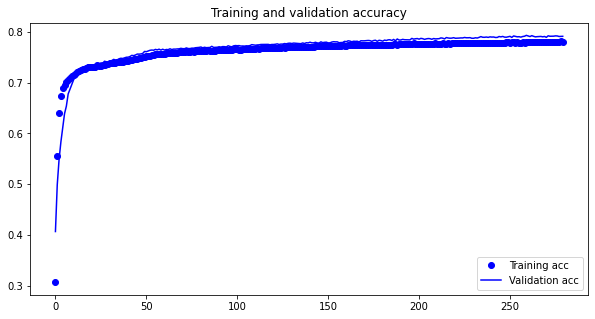

<Figure size 432x288 with 0 Axes>

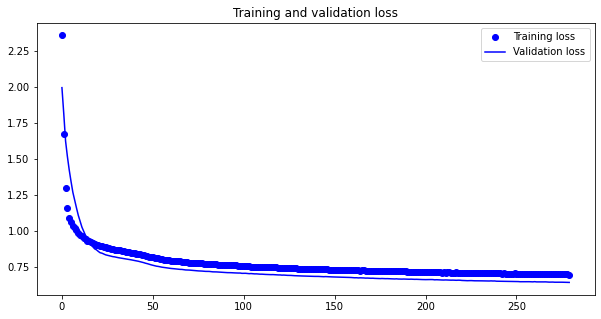

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.savefig('Training and validation accuracy.jpg')

plt.figure()

plt.figure(figsize=(10, 5))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.savefig('Training and validation loss.jpg')

plt.show()

In [113]:
from google.colab import files
files.download('ConfusionMatrixDisplay.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
files.download('ConfusionMatrixDisplay_balance.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
files.download('Structure.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
files.download('Training and validation accuracy.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
files.download('Training and validation loss.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
files.download('acc_report.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
files.download('best_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
files.download('classification_report.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
files.download('confusion_matrix.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
files.download('confusion_matrix_balance.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
files.download('training.log')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
# ConfusionMatrixDisplay.jpg
# ConfusionMatrixDisplay_balance.jpg
# Structure.jpg
# Training and validation accuracy.jpg
# Training and validation loss.jpg
# acc_report.txt
# best_model.h5
# classification_report.txt
# confusion_matrix.txt
# confusion_matrix_balance.txt
# training.log